In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('course-project-taxi-trip-duration')
jovian.set_colab_id('1YvC3KdYZYGMQWpVyVI4lIRbkmI8PPEZ3')

# PREDICTING TAXI TRIP DURATION IN NYC
We are given historical data about taxi trips in NewYork City. The time duration of each trip is given along with the rest of the data like latitude/longitudinal coordinates, etc. We will try to build a machine learning model to predict the time duration each taxi trip is going to take in the test data file as accurately as possible. We will try different models and compare the errors and proceed with the one we think would be best suited to predict the duration of trips

# course-project-taxi-trip-duration

Use the "Run" button to execute the code.

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="course-project-taxi-trip-duration")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/noorullah-rizwann/course-project-taxi-trip-duration


'https://jovian.ai/noorullah-rizwann/course-project-taxi-trip-duration'

First lets install all the required libraies/modules

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import jovian
import os
import zipfile
import math
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Dataset

The dataset is available on kaggle at https://www.kaggle.com/competitions/nyc-taxi-trip-duration

We will use the opendatasets library to download all the files inside this link. Then we will create dataframes for training and test sets respectively

In [ ]:
od.download('https://www.kaggle.com/competitions/nyc-taxi-trip-duration')

Skipping, found downloaded files in "./nyc-taxi-trip-duration" (use force=True to force download)


In [ ]:
os.listdir('nyc-taxi-trip-duration')

['train.zip', 'test.zip', 'sample_submission.zip']

### Training dataframe

In [ ]:
zf=zipfile.ZipFile('nyc-taxi-trip-duration/train.zip')

In [ ]:
orig_df=pd.read_csv(zf.open('train.csv'))
train_df=orig_df.copy()
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
train_df.shape

(1458644, 11)

In [ ]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Test dataframe

In [ ]:
zf1=zipfile.ZipFile('nyc-taxi-trip-duration/test.zip')
orig_test_df=pd.read_csv(zf1.open('test.csv'))
test_df=orig_test_df.copy()

### Submission dataframe

In [ ]:
zf2=zipfile.ZipFile('nyc-taxi-trip-duration/sample_submission.zip')
orig_sub_df=pd.read_csv(zf2.open('sample_submission.csv'))
sub_df=orig_sub_df.copy()


## Feature Engineering
We will try to add a few new columns to our training dataframe to better analyze the dataset with respect to the target column. For that case, we will be creating helper functions.

### Log Time Duration
We all take natural log of the target column trip_duration since the evaluation criteria for this project is mean squared logarthmic error. Moreover, a few relationships would be visualized better by taking natural log of the target column trip_duration

This will also be our target column. At the end, we will convert the time back to seconds using the numpy exponent function

In [ ]:
def log_time(df):
  df['log_time_duration']=np.log(df.trip_duration)

### Spliting Dates
We will split the pickup time date column into month, weekday, day, and hour. There could be a holiday someday or traffic could be more on some specific hours of the day. So these columns could prove useful

In [ ]:
def split_dates(df):
  df['pickup_month']=pd.to_datetime(df.pickup_datetime).dt.month
  df['pickup_weekday']=pd.to_datetime(df.pickup_datetime).dt.weekday
  df['pickup_day']=pd.to_datetime(df.pickup_datetime).dt.day
  df['pickup_time_hour']=pd.to_datetime(df.pickup_datetime).dt.hour

### Haversine Distance
We are given the pickup and dropoff latitude and longitude coordinates. Using them, we can calculate the distance between two points using the concept of Haversine Distance which is basically the distance between two points on a sphere. Since Earth is assumed to be an sphere, the distance calculated could be a good factor in designing our machine learning model later

The code below is based on the concept of haversine distance studied from an internet source mentioned at the end of the notebook

In [ ]:
def cal_distance(df):
  earth_radius=6370
  df['pickup_latitude_radians']=np.radians(df.pickup_latitude)
  df['pickup_longitude_radians']=np.radians(df.pickup_longitude)
  df['dropoff_latitude_radians']=np.radians(df.dropoff_latitude)
  df['dropoff_longitude_radians']=np.radians(df.dropoff_longitude)
  df['dlon']=df.dropoff_longitude_radians - df.pickup_longitude_radians
  df['dlat']=df.dropoff_latitude_radians - df.pickup_latitude_radians
  df['a'] = np.sin(df.dlat / 2)**2 + np.cos(df.pickup_latitude_radians) * np.cos(df.dropoff_latitude_radians) * np.sin(df.dlon / 2)**2
  df['c']=2 * np.arctan2(np.sqrt(df.a), np.sqrt(1 - df.a))
  df['Distance_km']=earth_radius*df.c

Although the above calculation does create a few columns, the Distance_km column is what we are interested in. It is the distance between pickup and dropoff coordinates in kilometers

In [ ]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

The helper functions are called to add the new columns

In [ ]:
log_time(train_df)
split_dates(train_df)
cal_distance(train_df)


In [ ]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_time_duration', 'pickup_month', 'pickup_weekday',
       'pickup_day', 'pickup_time_hour', 'pickup_latitude_radians',
       'pickup_longitude_radians', 'dropoff_latitude_radians',
       'dropoff_longitude_radians', 'dlon', 'dlat', 'a', 'c', 'Distance_km'],
      dtype='object')

## Exploratory Data Analysis
Lets see some trends and relationships for the target column with other columns


First lets see on which hours there are most taxi rides through a histogram

In [89]:
fig=px.histogram(train_df,
                 x='pickup_time_hour',
                 color='vendor_id',
                 color_discrete_sequence=['green','red'],
                 title='No. of Trips at different hours of the day')
fig.update_layout(bargap=0.1)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

It seems that there are almost equal number of trips for both the vendors at all hours of the day. Moreover, at hours 18:00, 19:00 were recorded the most trips, hence these hours seem to be the busiest at New York City 

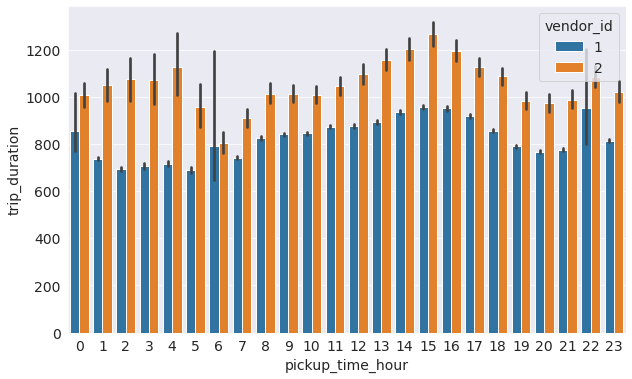

In [ ]:
sns.barplot(x='pickup_time_hour', y='trip_duration', hue='vendor_id', data=train_df)

The trips from vendor 1 on average takes less time to travel to the destination at all times of the day. So passengers travelling through taxis of this vendor are highly likely to get a faster service

In [90]:
fig=px.scatter(train_df,
                 x='pickup_time_hour',
                 y='log_time_duration',
                 color='vendor_id',
                 opacity=0.8,
                 title='Log Trip time vs Hour of the day')
fig.update_traces(marker_size=5)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

The scatter plot above doesn't show a linear relationship between the pickup time hour and log of time duration. 

In [91]:
fig=px.scatter(train_df,
                 x='Distance_km',
                 y='log_time_duration',
                 color='vendor_id',
                 opacity=0.8,
                 title='Log Trip time vs Distance in Kilometer')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
train_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_time_duration,pickup_month,pickup_weekday,pickup_day,pickup_time_hour,pickup_latitude_radians,pickup_longitude_radians,dropoff_latitude_radians,dropoff_longitude_radians,dlon,dlat,a,c,Distance_km
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304,0.019833,-0.006221,0.001311,0.000734,0.009299,0.001742,0.007820,0.004496,0.001528,-0.009589,0.003001,-0.000746,0.008109,0.008109
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471,0.021124,-0.002143,0.025191,0.002014,0.009101,-0.005125,0.002169,-0.002762,-0.000343,-0.003823,0.002000,0.001047,0.010306,0.010306
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542,0.110344,0.004474,-0.016356,-0.000874,0.010150,0.022568,1.000000,0.100190,0.783582,-0.333900,0.082270,0.036748,0.259780,0.259780
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204,-0.144149,-0.001439,-0.028976,-0.006495,0.010603,1.000000,0.022568,0.494038,0.114884,0.139935,-0.436748,0.148908,-0.210354,-0.210354
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678,0.071411,0.004758,-0.001130,-0.000456,-0.022455,0.114884,0.783582,0.124873,1.000000,0.323994,0.020302,-0.052441,0.134033,0.134033
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677,-0.123265,-0.000607,-0.021762,-0.005561,0.013612,0.494038,0.100190,1.000000,0.124873,0.036893,0.566364,-0.020803,-0.142128,-0.142128
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000,0.252624,0.006607,-0.000708,0.000566,0.003690,-0.029204,0.026542,-0.020677,0.014678,-0.018147,0.006290,0.004674,0.094777,0.094777
log_time_duration,0.019833,0.021124,0.110344,-0.144149,0.071411,-0.123265,0.252624,1.000000,0.046488,-0.027817,0.010385,0.039107,-0.144149,0.110344,-0.123265,0.071411,-0.059681,0.009103,0.023693,0.572128,0.572128
pickup_month,-0.006221,-0.002143,0.004474,-0.001439,0.004758,-0.000607,0.006607,0.046488,1.000000,-0.014544,-0.015135,-0.003438,-0.001439,0.004474,-0.000607,0.004758,0.000405,0.000736,0.000646,0.015667,0.015667
pickup_weekday,0.001311,0.025191,-0.016356,-0.028976,-0.001130,-0.021762,-0.000708,-0.027817,-0.014544,1.000000,0.004365,-0.084255,-0.028976,-0.016356,-0.021762,-0.001130,0.023191,0.004950,0.000024,0.007599,0.007599


The distance column we created has the highest correlation coefficient with the target column 'log_time_duration' i.e. 0.572. 

Relatively, The other columns don't seem to have a strong corelation coefficients as they are all close to 0

## Preparing Dataset for Training

In [ ]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_time_duration', 'pickup_month', 'pickup_weekday',
       'pickup_day', 'pickup_time_hour', 'pickup_latitude_radians',
       'pickup_longitude_radians', 'dropoff_latitude_radians',
       'dropoff_longitude_radians', 'dlon', 'dlat', 'a', 'c', 'Distance_km'],
      dtype='object')

### Identifying Input and Target columns

In [ ]:
input_cols=['vendor_id','passenger_count','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','pickup_month', 'pickup_weekday',
            'pickup_day', 'pickup_time_hour', 'Distance_km', 'store_and_fwd_flag']
target_col=['log_time_duration']

In [ ]:
inputs_df=train_df[input_cols].copy()
targets=train_df[target_col].copy()


In [ ]:
numeric_cols=inputs_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols=['store_and_fwd_flag']

In [ ]:
numeric_cols

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_month',
 'pickup_weekday',
 'pickup_day',
 'pickup_time_hour',
 'Distance_km']

In [ ]:
categorical_cols

['store_and_fwd_flag']

### Imputing missing Values

In [ ]:
inputs_df.isna().sum()

vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
pickup_month          0
pickup_weekday        0
pickup_day            0
pickup_time_hour      0
Distance_km           0
store_and_fwd_flag    0
dtype: int64

There are no null values in the dataframe, hence no need to create an imputer for missing values

### Encoding Categorical Columns

In [ ]:
inputs_df.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
flag_codes={'N':0, 'Y':1}
inputs_df['flag_code']=inputs_df.store_and_fwd_flag.map(flag_codes)
encoded_cols=['flag_code']

### Scaling Numeric Columns in the range (0,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])

MinMaxScaler()

In [ ]:
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [ ]:
inputs_df[numeric_cols]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_weekday,pickup_day,pickup_time_hour,Distance_km
0,1.0,0.111111,0.791302,0.365738,0.791591,0.731222,0.4,0.000000,0.433333,0.739130,0.001208
1,0.0,0.111111,0.791331,0.364062,0.791016,0.728287,1.0,1.000000,0.366667,0.000000,0.001455
2,1.0,0.111111,0.791354,0.365510,0.790920,0.726493,0.0,0.166667,0.600000,0.478261,0.005146
3,1.0,0.111111,0.790842,0.363001,0.790805,0.726206,0.6,0.333333,0.166667,0.826087,0.001197
4,1.0,0.111111,0.791452,0.367181,0.791454,0.732663,0.4,0.833333,0.833333,0.565217,0.000958
...,...,...,...,...,...,...,...,...,...,...,...
1458639,1.0,0.444444,0.791302,0.364459,0.791092,0.729055,0.6,0.666667,0.233333,0.565217,0.000987
1458640,0.0,0.111111,0.790992,0.364565,0.791500,0.733858,0.0,1.000000,0.300000,0.304348,0.004875
1458641,1.0,0.111111,0.791682,0.365787,0.790935,0.726262,0.6,0.666667,0.700000,0.260870,0.006306
1458642,0.0,0.111111,0.791304,0.364661,0.791426,0.730498,0.0,0.166667,0.133333,0.652174,0.000880


In [ ]:
inputs_df[numeric_cols].describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_weekday,pickup_day,pickup_time_hour,Distance_km
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,5.349503e-01,1.849477e-01,7.914453e-01,3.647671e-01,7.914464e-01,7.300461e-01,5.033635e-01,5.083958e-01,4.834673e-01,5.915863e-01,2.772858e-03
std,4.987772e-01,1.460269e-01,1.170040e-03,1.876631e-03,1.165773e-03,3.057147e-03,3.362075e-01,3.256732e-01,2.901045e-01,2.782475e-01,3.462413e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.111111e-01,7.911420e-01,3.639923e-01,7.911508e-01,7.286905e-01,2.000000e-01,1.666667e-01,2.333333e-01,3.913043e-01,9.926891e-04
50%,1.000000e+00,1.111111e-01,7.913091e-01,3.649485e-01,7.913418e-01,7.302782e-01,6.000000e-01,5.000000e-01,4.666667e-01,6.086957e-01,1.687245e-03
75%,1.000000e+00,2.222222e-01,7.915469e-01,3.657624e-01,7.916180e-01,7.315802e-01,8.000000e-01,8.333333e-01,7.333333e-01,8.260870e-01,3.122984e-03
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
inputs_df=inputs_df[numeric_cols+encoded_cols]
inputs_df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_weekday,pickup_day,pickup_time_hour,Distance_km,flag_code
0,1.0,0.111111,0.791302,0.365738,0.791591,0.731222,0.4,0.000000,0.433333,0.739130,0.001208,0
1,0.0,0.111111,0.791331,0.364062,0.791016,0.728287,1.0,1.000000,0.366667,0.000000,0.001455,0
2,1.0,0.111111,0.791354,0.365510,0.790920,0.726493,0.0,0.166667,0.600000,0.478261,0.005146,0
3,1.0,0.111111,0.790842,0.363001,0.790805,0.726206,0.6,0.333333,0.166667,0.826087,0.001197,0
4,1.0,0.111111,0.791452,0.367181,0.791454,0.732663,0.4,0.833333,0.833333,0.565217,0.000958,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1.0,0.444444,0.791302,0.364459,0.791092,0.729055,0.6,0.666667,0.233333,0.565217,0.000987,0
1458640,0.0,0.111111,0.790992,0.364565,0.791500,0.733858,0.0,1.000000,0.300000,0.304348,0.004875,0
1458641,1.0,0.111111,0.791682,0.365787,0.790935,0.726262,0.6,0.666667,0.700000,0.260870,0.006306,0
1458642,0.0,0.111111,0.791304,0.364661,0.791426,0.730498,0.0,0.166667,0.133333,0.652174,0.000880,0


In [ ]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  float64
 1   passenger_count     1458644 non-null  float64
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   pickup_month        1458644 non-null  float64
 7   pickup_weekday      1458644 non-null  float64
 8   pickup_day          1458644 non-null  float64
 9   pickup_time_hour    1458644 non-null  float64
 10  Distance_km         1458644 non-null  float64
 11  store_and_fwd_flag  1458644 non-null  object 
 12  flag_code           1458644 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 144.7+ MB


### Splitting the datsets for Training & Validation
90% of the data would be used for training. The rest for validation

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_inputs, val_inputs, train_targets, val_targets= train_test_split(inputs_df, targets, test_size=0.1, random_state=42)

In [ ]:
train_inputs.shape

(1312779, 13)

In [ ]:
val_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_weekday,pickup_day,pickup_time_hour,Distance_km,store_and_fwd_flag,flag_code
67250,1.0,0.111111,0.791245,0.363912,0.791332,0.730784,1.0,0.333333,0.233333,0.304348,0.002227,N,0
1397036,1.0,0.111111,0.791364,0.365534,0.791146,0.729881,0.6,1.000000,0.066667,0.521739,0.001579,N,0
1021087,1.0,0.555556,0.791188,0.364394,0.791447,0.729781,1.0,1.000000,0.133333,0.086957,0.001132,N,0
951424,1.0,0.222222,0.791167,0.363638,0.791152,0.729801,0.8,0.500000,0.133333,0.739130,0.001595,N,0
707882,0.0,0.444444,0.794482,0.358817,0.791220,0.730679,0.8,0.500000,0.366667,0.739130,0.016792,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526279,1.0,0.111111,0.791400,0.365147,0.791449,0.731142,1.0,0.333333,0.000000,0.869565,0.000667,N,0
80354,0.0,0.333333,0.791304,0.365490,0.791255,0.728972,0.8,0.833333,0.433333,0.652174,0.002195,N,0
328645,1.0,0.333333,0.794594,0.358690,0.791145,0.729862,0.8,0.166667,1.000000,0.869565,0.017044,N,0
657429,0.0,0.111111,0.791344,0.364821,0.791421,0.730600,0.4,0.000000,0.666667,0.739130,0.000659,N,0


## Creating Machine Learning Models
Since its a Regression problem, We will be using RandomForest Regressor and the XGboost models to analyze and predict the data by calculating root mean squared error. Then we will try hyperparameter tuning to reduce the validation rmse. Eventually we will proceed with the model with the lowest validation rmse.

## 1: RandomForestRegressor

### Training model & rmse loss

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
train_preds=model.predict(train_inputs)
train_preds

array([6.26888888, 6.19167906, 7.00879007, ..., 7.31451641, 5.9711587 ,
       7.36788556])

In [ ]:
val_preds=model.predict(val_inputs)

In [ ]:
train_targets

,log_time_duration
879655,6.329721
646838,6.186209
1138713,6.955593
864716,6.052089
434927,6.011267
...,...
259178,7.155396
1414414,6.725034
131932,7.158514
671155,5.963579


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_rmse=mean_squared_error(train_preds, train_targets, squared=False)
val_rmse=mean_squared_error(val_preds, val_targets, squared=False)

In [ ]:
train_rmse, val_rmse

(0.1803041895047248, 0.4272864944470673)

The training and validation errors have been calculated as above. 

In [ ]:
val_preds

array([6.63749101, 6.57875352, 5.91708045, ..., 7.73107684, 5.86113437,
       5.46503797])

In [ ]:
val_targets

,log_time_duration
67250,6.946976
1397036,6.717805
1021087,6.419995
951424,6.765039
707882,8.510571
...,...
526279,5.978886
80354,6.658011
328645,7.759614
657429,5.973810


In [ ]:
val_targets.mean()

log_time_duration    6.465028
dtype: float64

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/noorullah-rizwann/course-project-taxi-trip-duration


'https://jovian.ai/noorullah-rizwann/course-project-taxi-trip-duration'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

### HyperParameter Tuning
Now we will try hyperparameter tuning to reduce the validation error on the overfitting curve for the RandomForestRegressor model we created

We will create a helper function test_params and pass to it different values of parameters and analyze the errors

In [ ]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

#### n_estimators

In [ ]:
test_params(n_estimators=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.20821658960877765, 0.44931706436269475)

In [ ]:
test_params(n_estimators=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.1700276463481815, 0.419667826924148)

In [ ]:
test_params(n_estimators=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.16454596102462402, 0.41593562272911627)

n_estimators=20 seems to be a better value as it gives the lowest validation error

Another helper fubction is defined with a n_estimators set at 20 and varying other parameters to see the errors

In [ ]:
def test_params_const_n_est(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=20, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

#### max_depth

In [ ]:
test_params_const_n_est(max_depth=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.5339011936126692, 0.5383776512083263)

In [ ]:
test_params_const_n_est(max_depth=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.45833207679056237, 0.46780473876465506)

In [ ]:
test_params_const_n_est(max_depth=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.3161938181285681, 0.4226642814059941)

In [ ]:
test_params_const_n_est(max_depth=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.1863304363366188, 0.415743399978883)

The max_depth of 20 seems to give the lowest validation error

#### min_samples_leaf

In [ ]:
test_params_const_n_est(min_samples_leaf=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.16454596102462402, 0.41593562272911627)

In [ ]:
test_params_const_n_est(min_samples_leaf=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.24624714139194423, 0.4115908622267881)

In [ ]:
test_params_const_n_est(min_samples_leaf=6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.3021262139504197, 0.41006658001128465)

min_samples_leaf doesn't have a major effect on the errors

#### max_features

In [ ]:
test_params_const_n_est(max_features=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.1688778313082322, 0.4254865645087845)

In [ ]:
test_params_const_n_est(max_features=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.16304893393879588, 0.4123610643914954)

In [ ]:
test_params_const_n_est(max_features=0.8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.16364586915573745, 0.4142369687079782)

Same goes for max_features (No such effect on error)

### Putting it Together for RandomForestRegressor

In [ ]:
test_params(n_estimators=20, max_depth=30, min_samples_leaf=6, max_features=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.31313634322036143, 0.40678104656174835)

##2: XGBoost

### Training model & rmse loss

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=20)

In [ ]:
model.fit(train_inputs, train_targets)

[10:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=20, n_jobs=-1, random_state=42)

In [ ]:
train_preds2=model.predict(train_inputs)
val_preds2=model.predict(val_inputs)

In [ ]:
train_rmse2=mean_squared_error(train_preds2, train_targets)
val_rmse2=mean_squared_error(val_preds2, val_targets)

In [ ]:
train_rmse2, val_rmse2

(0.01823574690850151, 0.15667657496307597)

In [ ]:
val_targets

,log_time_duration
67250,6.946976
1397036,6.717805
1021087,6.419995
951424,6.765039
707882,8.510571
...,...
526279,5.978886
80354,6.658011
328645,7.759614
657429,5.973810


In [ ]:
val_preds2

array([6.6193085, 6.687004 , 6.103874 , ..., 7.808759 , 5.773875 ,
       5.6612706], dtype=float32)

### HyperParameter Tuning

In [ ]:
def test_params2(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse2 = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse2 = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse2, val_rmse2

#### n_estimators

In [ ]:
test_params2(n_estimators=10)

[10:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2.1516853007402297, 2.153699482815737)

In [ ]:
test_params2(n_estimators=30)

[10:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.5440560081946834, 0.5483471200969486)

In [ ]:
test_params2(n_estimators=100)

[10:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4484664158436235, 0.4531734071902341)

#### max_depth

In [ ]:
test_params2(n_estimators=100, max_depth=3)

[10:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4484664158436235, 0.4531734071902341)

In [ ]:
test_params2(n_estimators=100, max_depth=6)

[10:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.41825372837975144, 0.42609603957679226)

In [ ]:
test_params2(n_estimators=100, max_depth=10)

[10:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.36890508972046554, 0.40375984587845554)

In [ ]:
test_params2(n_estimators=100, max_depth=20)

[10:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.13503979749874298, 0.39582391913965476)

#### learning_rate

In [ ]:
test_params2(n_estimators=100, learning_rate=0.01)

[11:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2.252986056264769, 2.254912270961598)

In [ ]:
test_params2(n_estimators=100, learning_rate=0.1)

[11:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4484664158436235, 0.4531734071902341)

In [ ]:
test_params2(n_estimators=100, learning_rate=0.3)

[11:16:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4333913931956763, 0.4393109150515189)

In [ ]:
test_params2(n_estimators=100, learning_rate=0.5)

[11:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4278456859623037, 0.43379010140340823)

In [ ]:
test_params2(n_estimators=100, learning_rate=0.7)

[11:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4250769016967997, 0.4313370836987829)

In [ ]:
test_params2(n_estimators=100, learning_rate=0.9)

[11:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.42408398284768445, 0.43042398924728)

#### subsample

In [ ]:
test_params2(n_estimators=100, subsample=0.1)

[11:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.44857706783617224, 0.45292728234450613)

In [ ]:
test_params2(n_estimators=100, subsample=0.4)

[11:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.44866796509869067, 0.4532739190632897)

In [ ]:
test_params2(n_estimators=100, subsample=0.7)

[11:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4486530071804086, 0.4533789689115442)

#### colsample_bytree

In [ ]:
test_params2(n_estimators=100, colsample_bytree=0.1)

[11:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.5350412055134752, 0.5401606696729085)

In [ ]:
test_params2(n_estimators=100, colsample_bytree=0.3)

[11:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.46726612043359517, 0.4717266466861409)

In [ ]:
test_params2(n_estimators=100, colsample_bytree=0.6)

[11:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.4510318531766353, 0.4555485589818679)

In [ ]:
test_params2(n_estimators=100, colsample_bytree=0.8)

[11:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.448494915380476, 0.45327803622921403)

The subsample, colsample_bytree donot seem to have an effect on the validation rmse

### Puting it Together for XGBoostRegreesor

So the max_depth of 20 with n_estimators equal to 100 and all other parameters at their default value gives the least validation rmse

In [ ]:
jovian.commit()

## Preparation of Test_df for testing with XGBoost

In [ ]:
test_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [ ]:
split_dates(test_df)
cal_distance(test_df)
test_inputs_df=test_df[input_cols].copy()
test_numeric_cols=test_inputs_df[input_cols].select_dtypes(include=np.number).columns.tolist()
test_categorical_cols=['store_and_fwd_flag']
flag_codes={'N':0, 'Y':1}
test_inputs_df['flag_code']=test_inputs_df.store_and_fwd_flag.map(flag_codes)
test_encoded_cols=['flag_code']
scaler.fit(test_inputs_df[test_numeric_cols])
test_inputs_df[test_numeric_cols] = scaler.transform(test_inputs_df[test_numeric_cols])
test_inputs_df=test_inputs_df[test_numeric_cols+test_encoded_cols]

In [ ]:
test_numeric_cols

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_month',
 'pickup_weekday',
 'pickup_day',
 'pickup_time_hour',
 'Distance_km']

In [ ]:
test_inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vendor_id          625134 non-null  float64
 1   passenger_count    625134 non-null  float64
 2   pickup_longitude   625134 non-null  float64
 3   pickup_latitude    625134 non-null  float64
 4   dropoff_longitude  625134 non-null  float64
 5   dropoff_latitude   625134 non-null  float64
 6   pickup_month       625134 non-null  float64
 7   pickup_weekday     625134 non-null  float64
 8   pickup_day         625134 non-null  float64
 9   pickup_time_hour   625134 non-null  float64
 10  Distance_km        625134 non-null  float64
 11  flag_code          625134 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 57.2 MB


In [ ]:
test_inputs_df.shape

(625134, 12)

## Final Model

Though there was not much of a difference in the validation errors between the two models, we will proceed with the XGboostRegressor as it had a slighlty less error as compared to the RandomForestRegressor model

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=20)

The model is trained through the train_inputs which is 90% of the data in training dataframe. So it would be good to go

In [ ]:
model.fit(train_inputs, train_targets)

[12:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=20, n_jobs=-1, random_state=42)

In [ ]:
test_preds=model.predict(test_inputs_df)
test_preds

array([6.3063436, 6.27259  , 5.5327506, ..., 6.840295 , 7.5178547,
       7.0027347], dtype=float32)

In [ ]:
model.predict(train_inputs)

array([6.255489 , 6.1759205, 7.1359553, ..., 7.2043743, 5.8884797,
       7.3309894], dtype=float32)

### Feature Importances

In [ ]:
importance_df = pd.DataFrame({
    'feature': test_inputs_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
10,Distance_km,0.631457
9,pickup_time_hour,0.088267
7,pickup_weekday,0.058863
5,dropoff_latitude,0.042961
4,dropoff_longitude,0.027089
3,pickup_latitude,0.026540
6,pickup_month,0.026032
8,pickup_day,0.023743
0,vendor_id,0.022976
2,pickup_longitude,0.022075


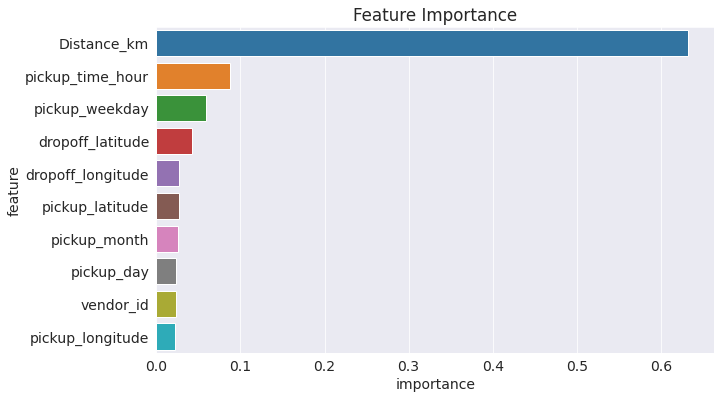

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

It is evident that that the Distance_km column we created through feature engineering has the most weightage of 0.63 in determining the trip duration, followed by pickup_time_hour and pickup_weekday. (also created through feature engineering)

## Prepartaion of Submission file from test predictions

In [ ]:
sub_df

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [ ]:
submission = pd.DataFrame({'id': sub_df.id, 'trip_duration':np.exp(test_preds)-1})
submission.to_csv('submission.csv', index=None)
submission.trip_duration

0          547.037354
1          528.847961
2          251.838425
3          753.931824
4          301.447815
             ...     
625129     133.720215
625130     855.283936
625131     933.764709
625132    1839.614258
625133    1098.636230
Name: trip_duration, Length: 625134, dtype: float32

In [ ]:
submission.head()

,id,trip_duration
0,id3004672,547.037354
1,id3505355,528.847961
2,id1217141,251.838425
3,id2150126,753.931824
4,id1598245,301.447815


In [ ]:
from IPython.display import FileLink
FileLink('submission.csv')

/content/submission.csv

## Saving and Loading Final Trained Model

In [ ]:
import joblib

In [ ]:
nyc_taxi_trip_duartion = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'feature_importance': importance_df
}

In [ ]:
joblib.dump(nyc_taxi_trip_duartion, 'nyc_taxi_trip_duartion_weights')

['nyc_taxi_trip_duartion_weights']

## Conclusion
We have finally trained the model to predict the time duration for taxi trips in test file. The model used was XGboost Regressor and the hyperparameters have been stated above. First the dataset was prepared for training by imputing missing values (if any), scaling numeric columns and creating encoded columns. Then it was split into two sets, one for training and the second for validation. We calculated the root mean squared error on the target column log_time_duration to train the model and then fit it in the test file. The Distance column ws created using the concept of Haversine distance and by looking at the feature importances, it had the major impact with the most weightage. Eventually, using exponent in numpy array, the log_time_duration column was converted back to the time duration in seconds.

## References
Mentioned below are the links to sources I found useful for this project

https://www.kaggle.com/code/coreprinciple/taxi-cleaned-data

https://www.kaggle.com/code/mirhyun0508/2022-smarcle-ai-study-nyc-taxi-trip-duration-eda

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.

In [92]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/noorullah-rizwann/course-project-taxi-trip-duration


'https://jovian.ai/noorullah-rizwann/course-project-taxi-trip-duration'